In [1]:
library(tidyverse)
library(MASS)
library(class)
install.packages("randomForest")
library(randomForest)
install.packages("corrplot")
library(corrplot)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [2]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [3]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [4]:
# read in water data
water <- read_csv("https://raw.githubusercontent.com/bennysun1/data352/data/waterQuality1.csv", na = "#NUM!")


Rows: 7999 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (21): aluminium, ammonia, arsenic, barium, cadmium, chloramine, chromium...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
# check to see number of rows with missing values
missing_rows <- water[!complete.cases(water),]
nrow(missing_rows)

# only 3 rows missing ammonia levels and if the water is safe or 
# not so can just remove them
water <-
  water %>%
  drop_na(.) %>%
  mutate(is_safe = factor(is_safe))


[1] 3

In [6]:
# 80-20 train test split
set.seed(1)
train <- sample(1:nrow(water), nrow(water)*0.80)

water.train <- water[train,]
water.test <- water[-train,]


----------------------------------------------------------------------

# Fit LDA

In [7]:
predictors <- c('aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium')

training_vars <- c('aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe')

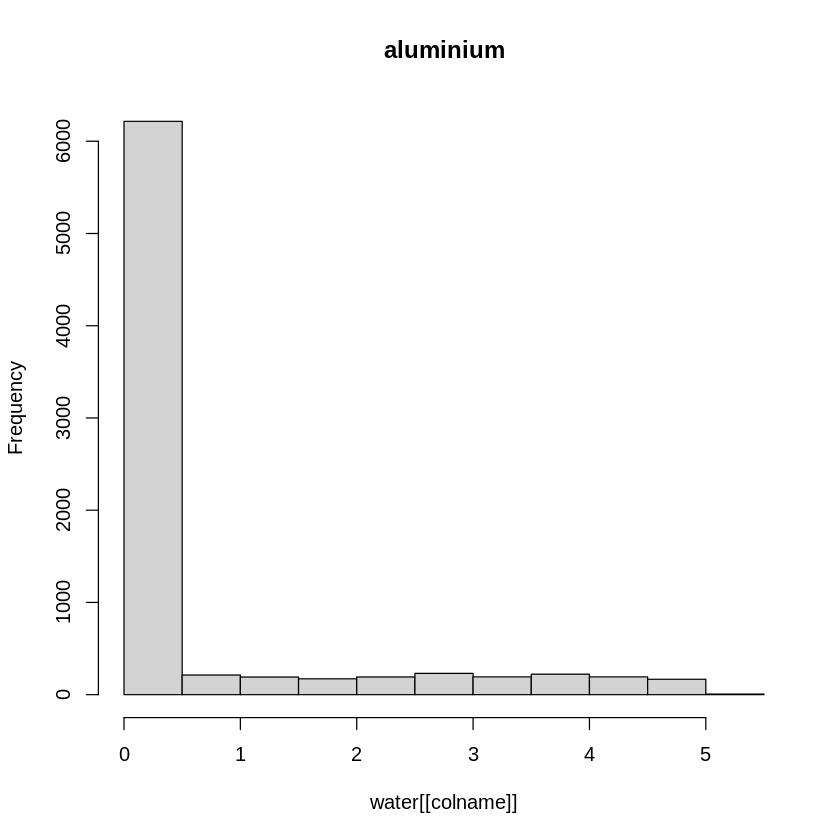

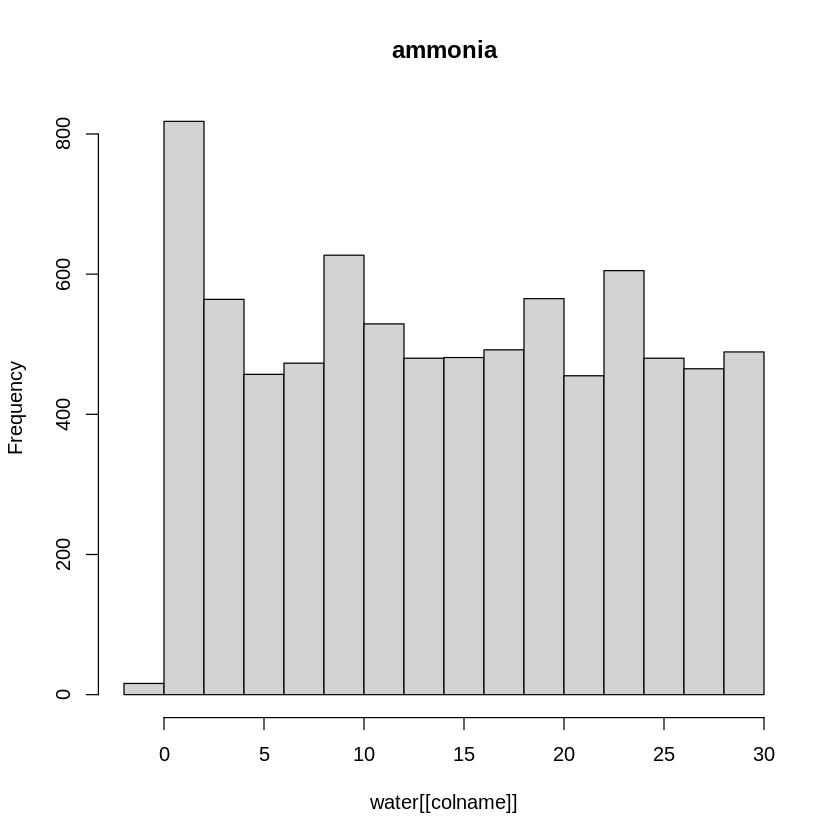

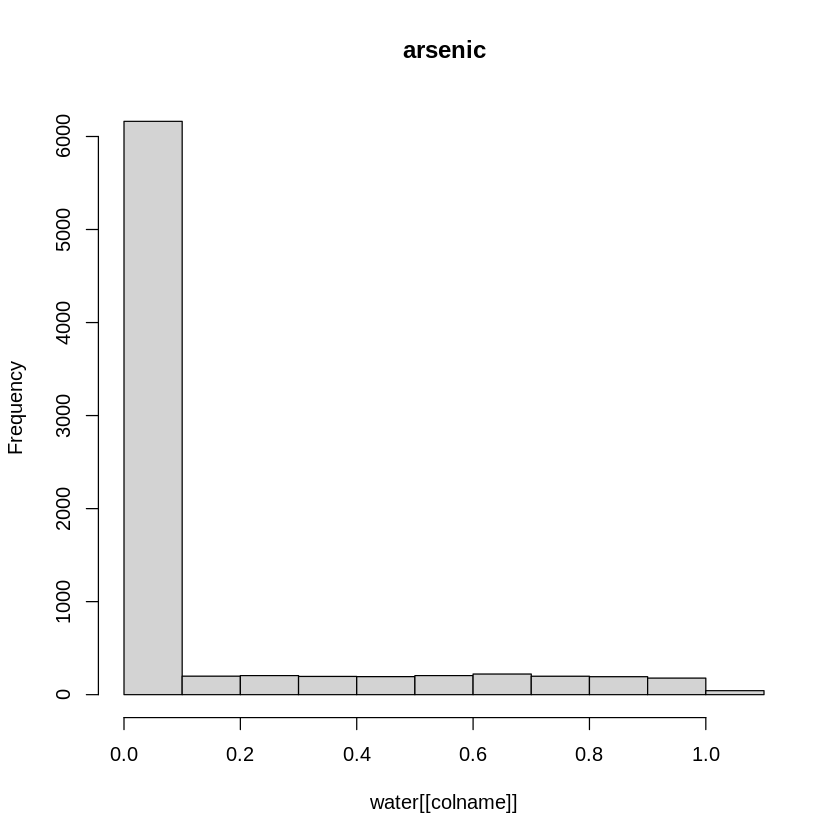

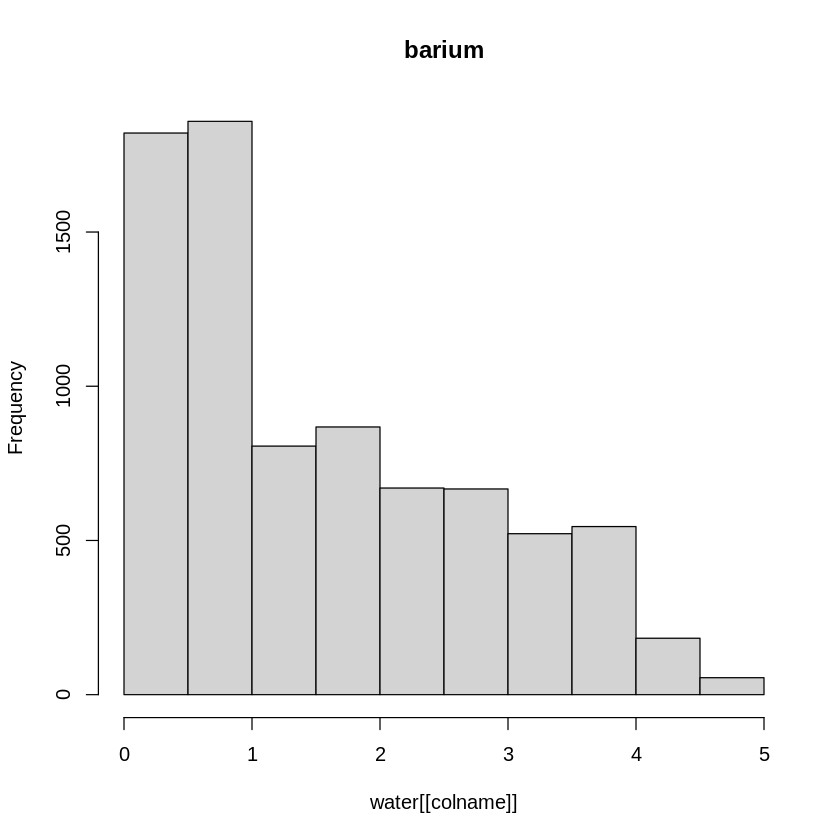

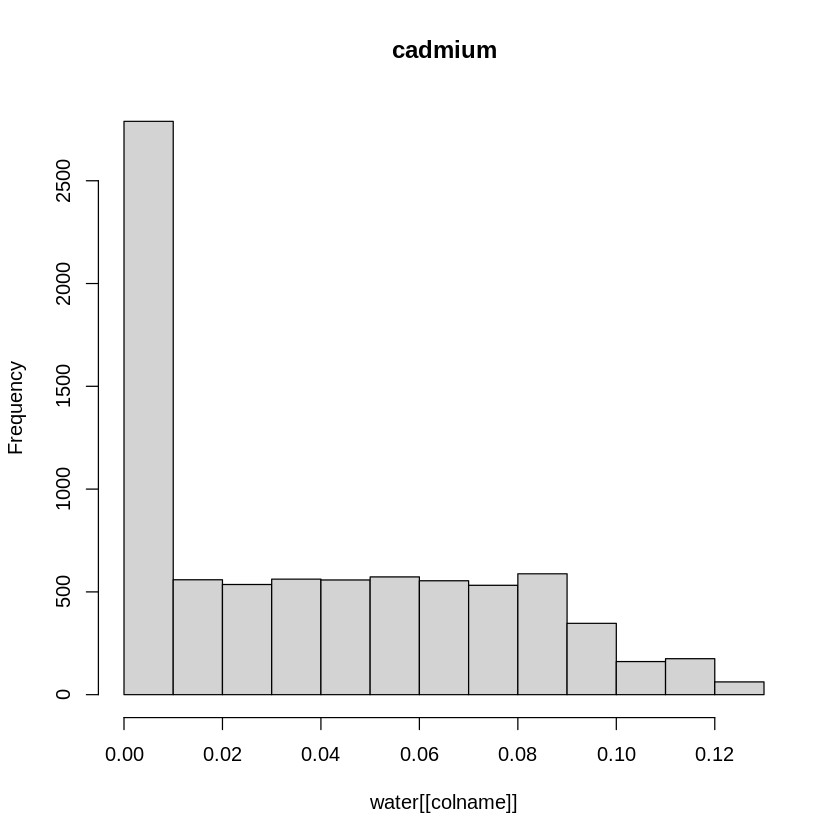

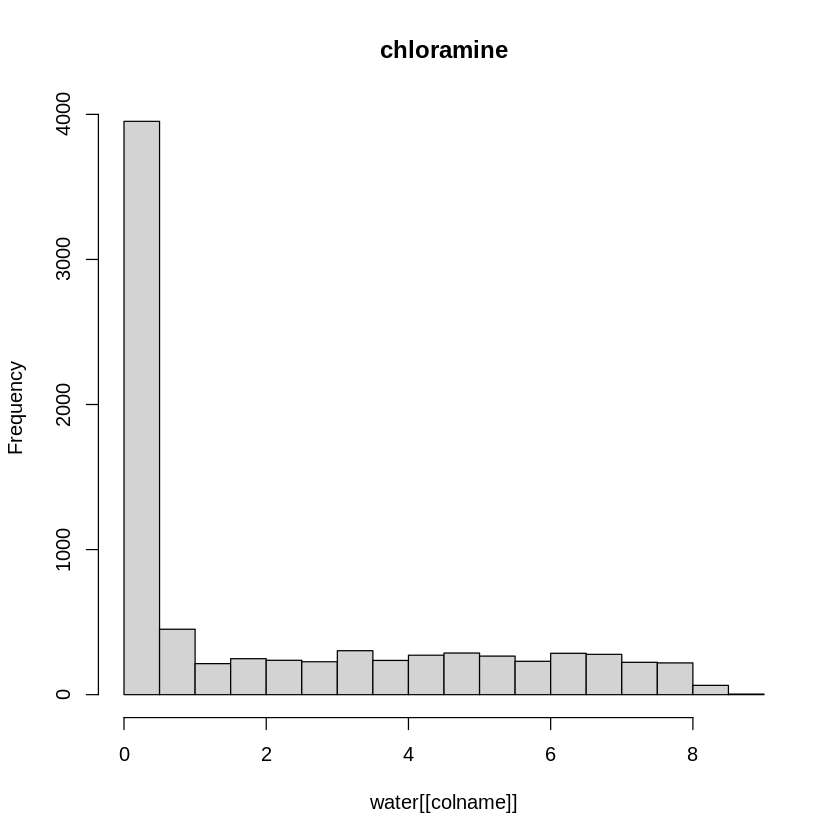

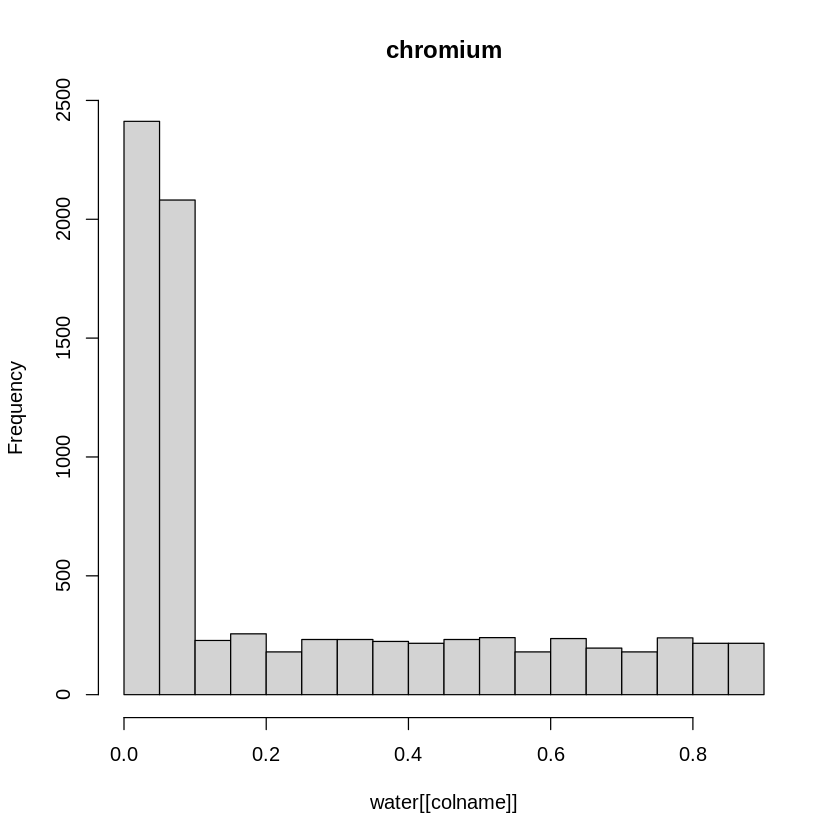

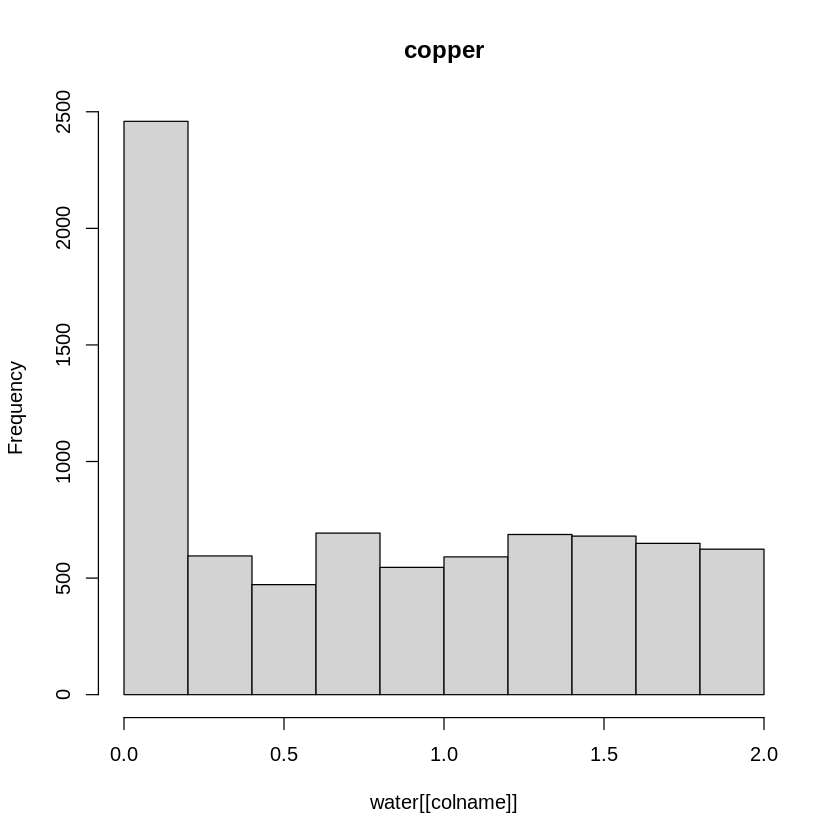

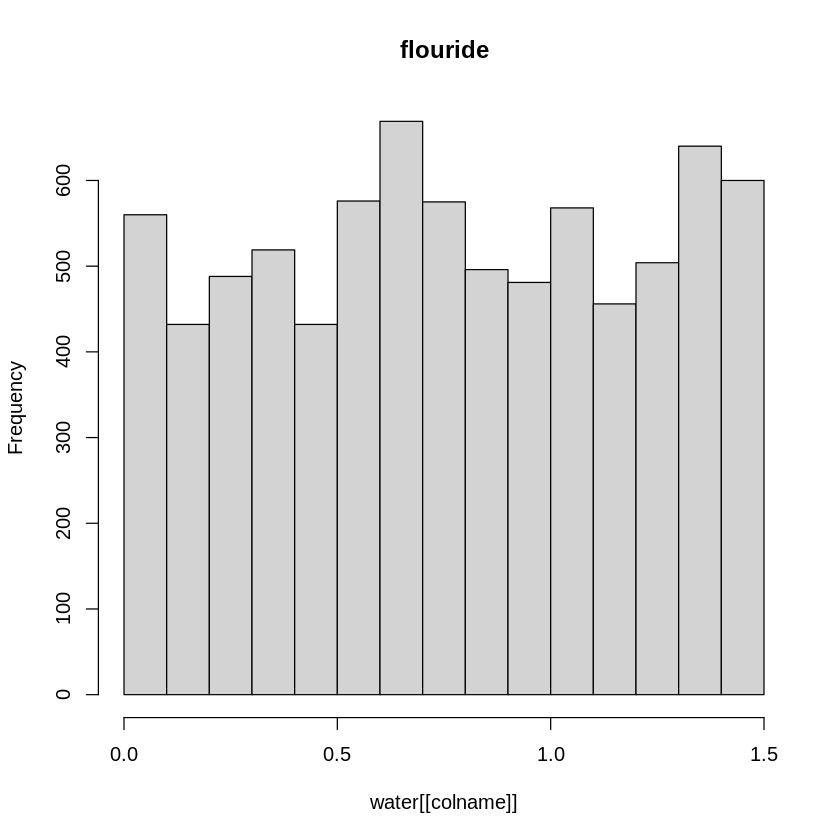

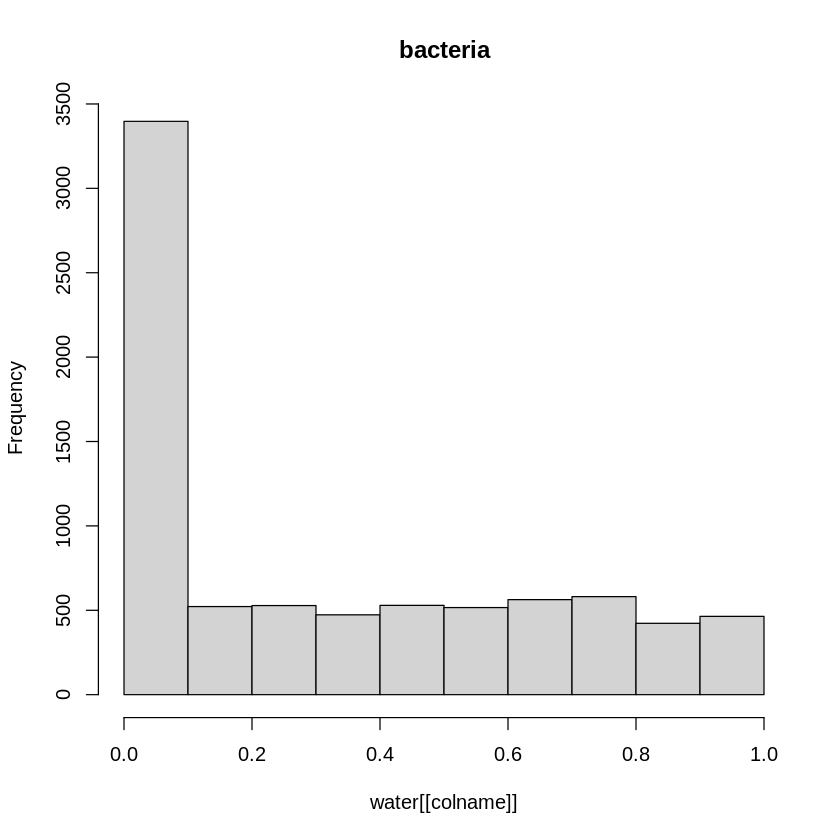

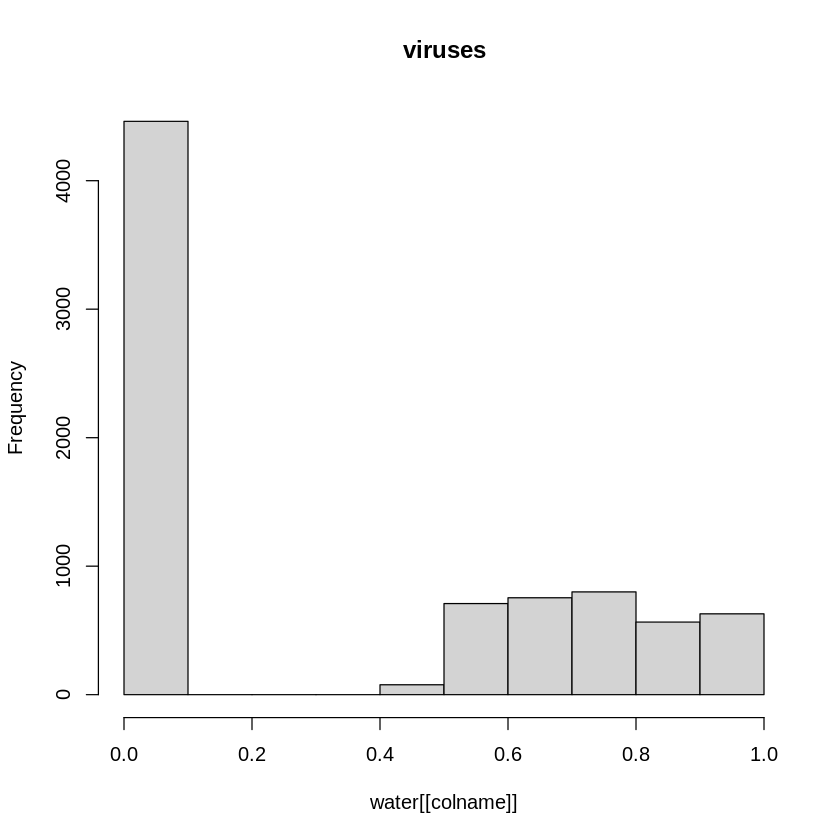

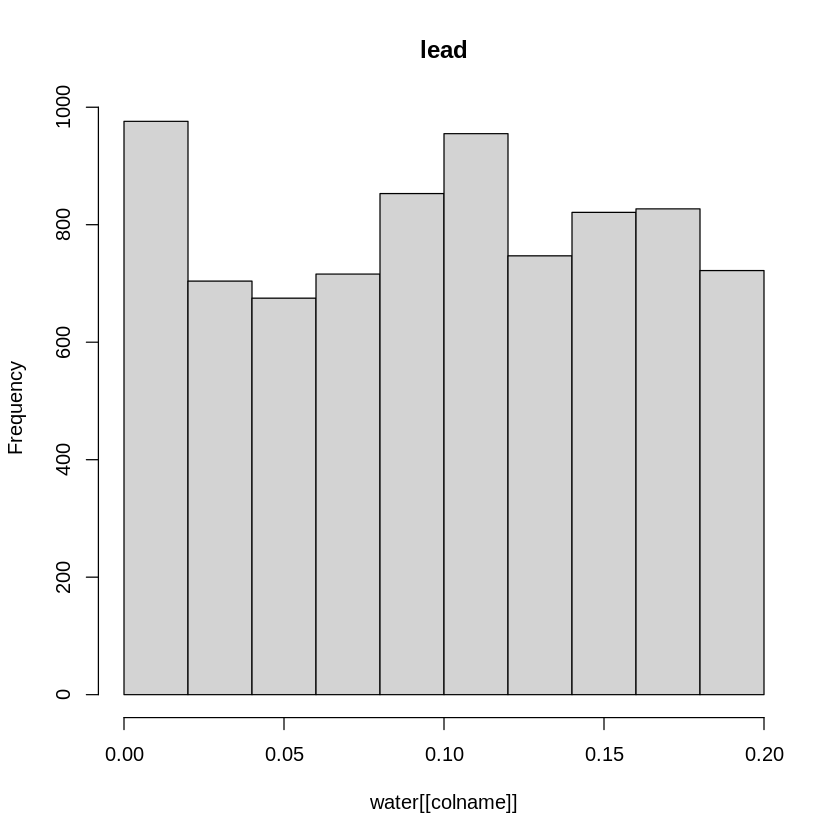

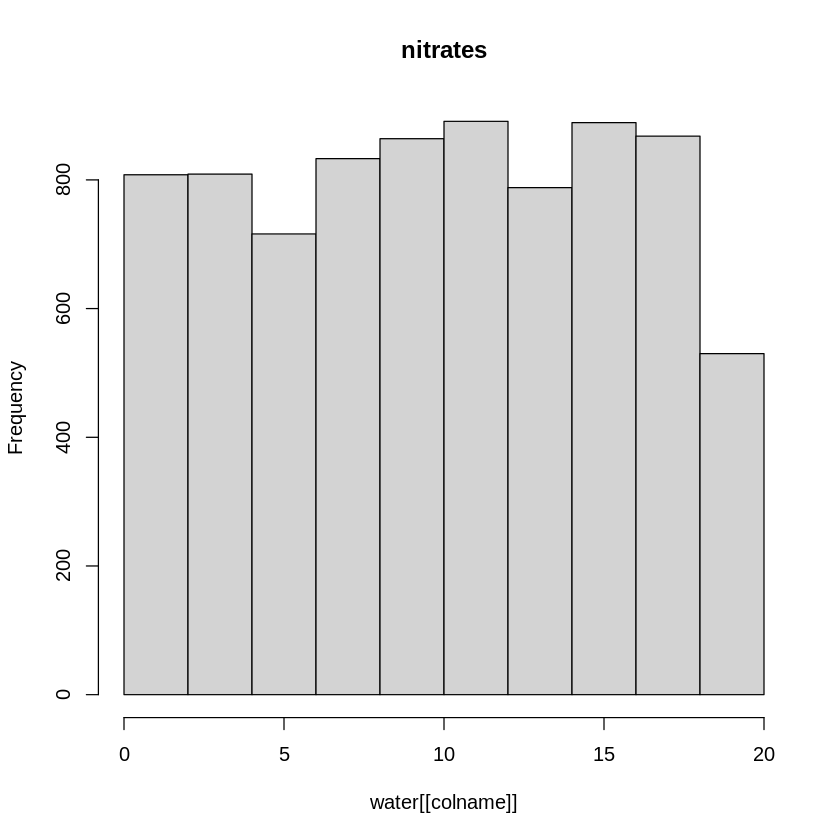

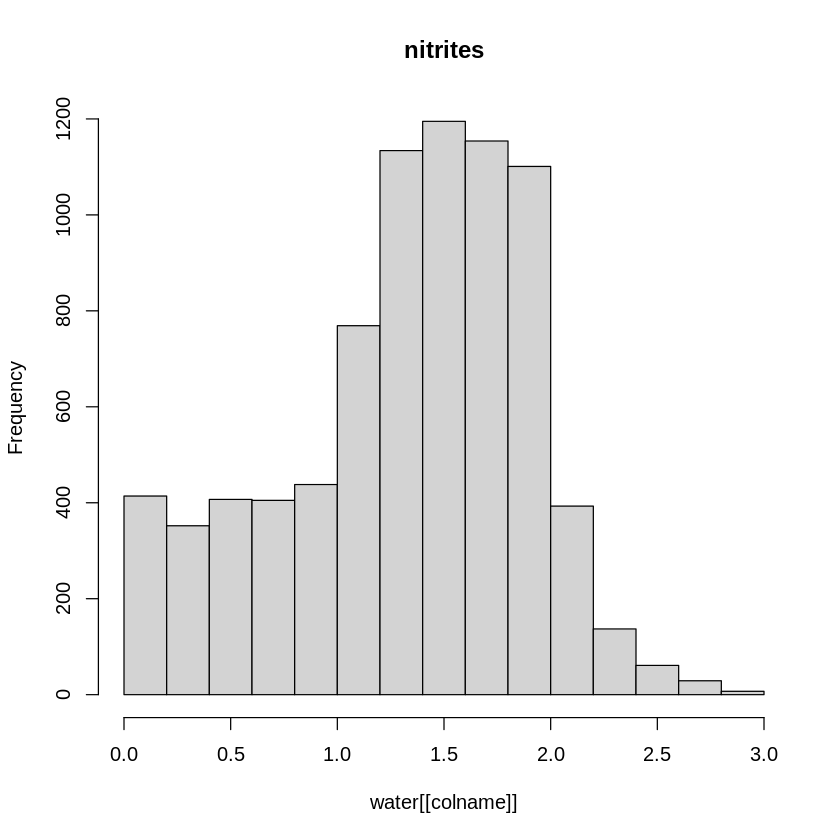

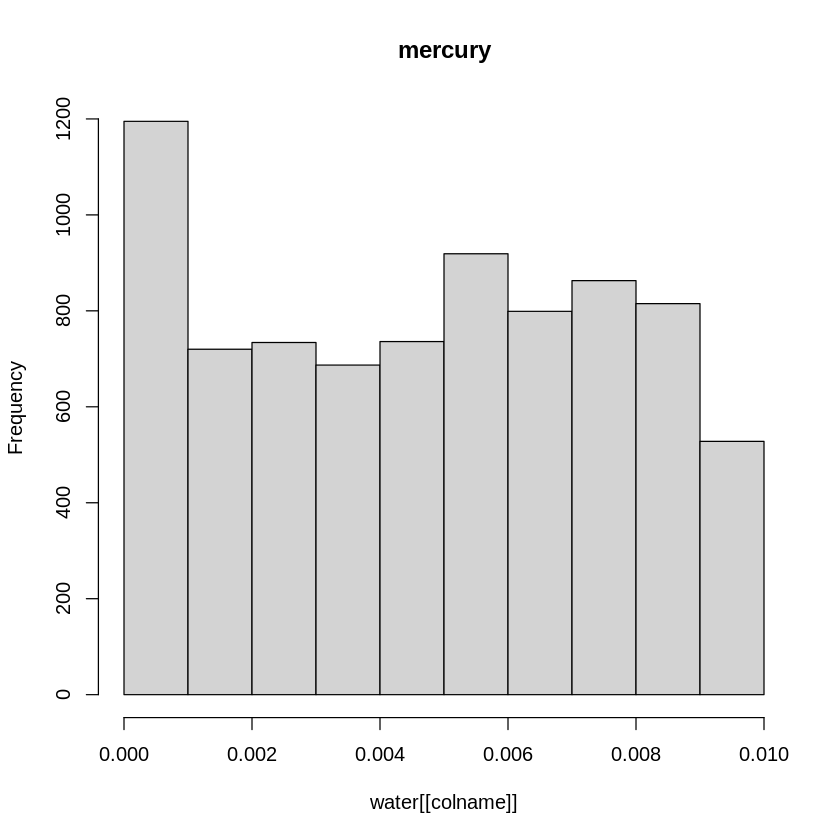

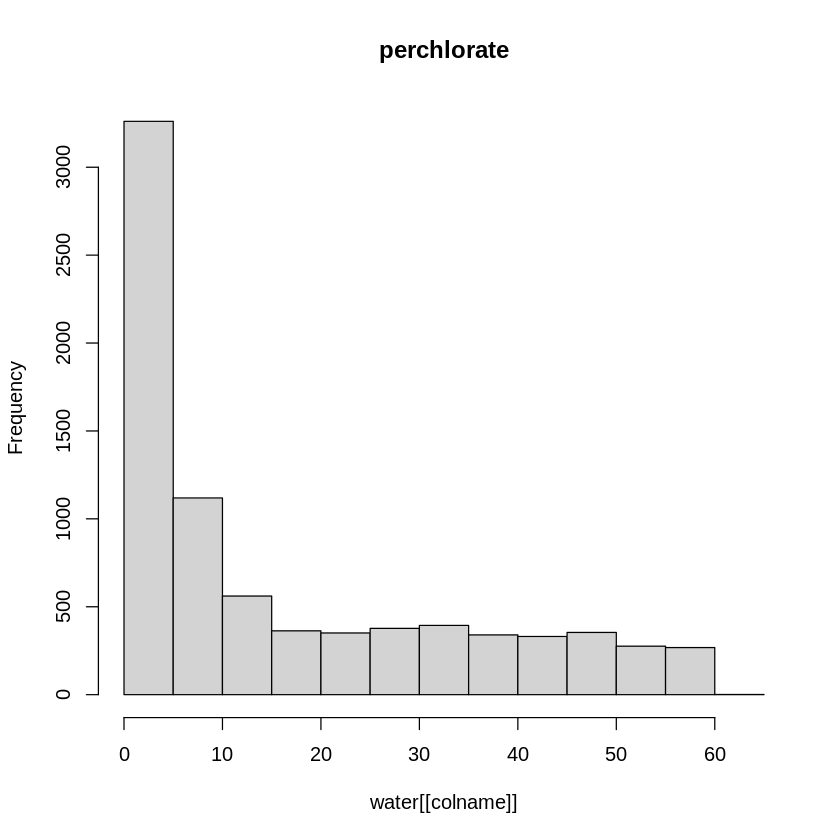

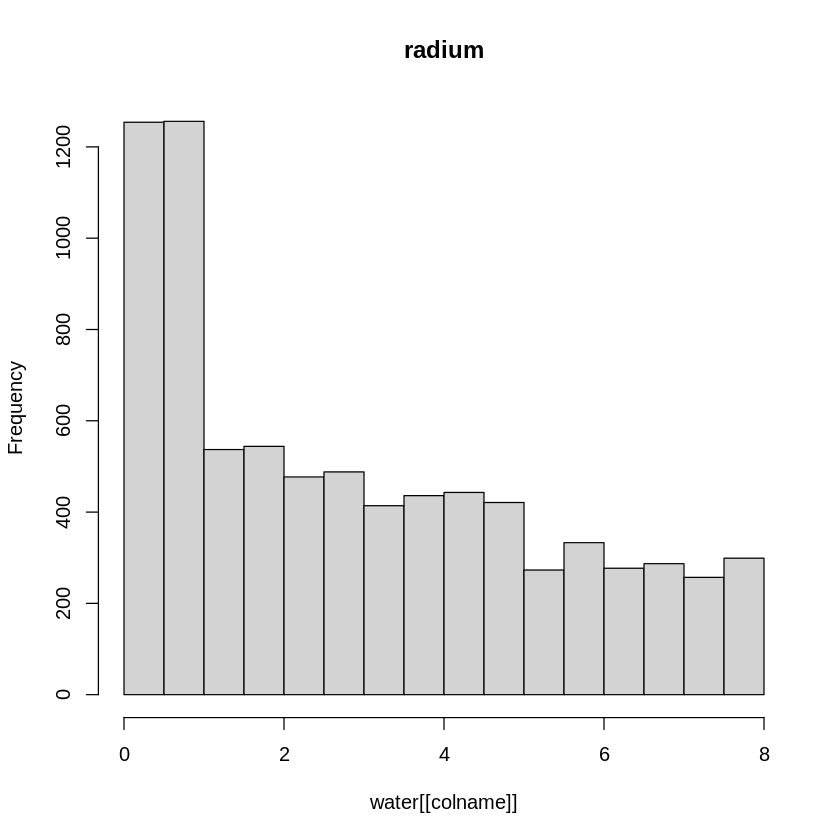

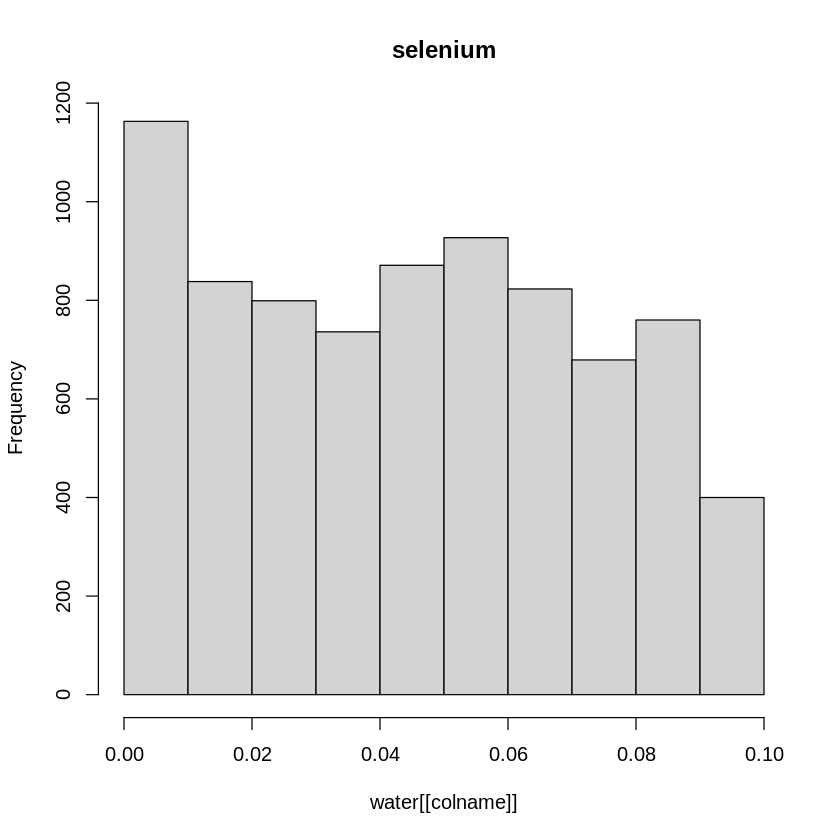

ERROR: ignored

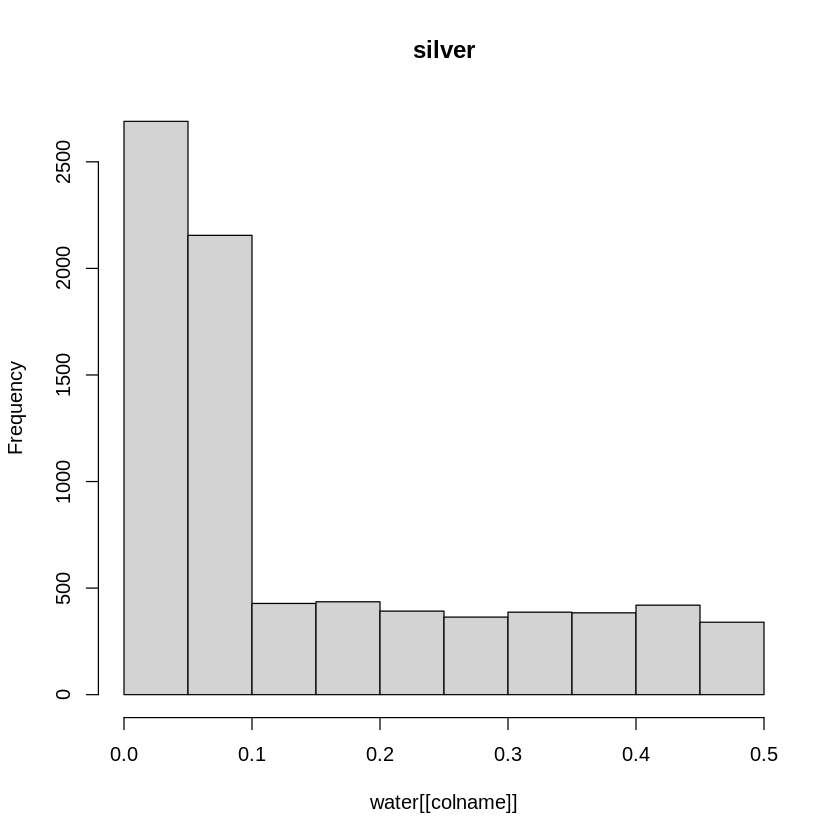

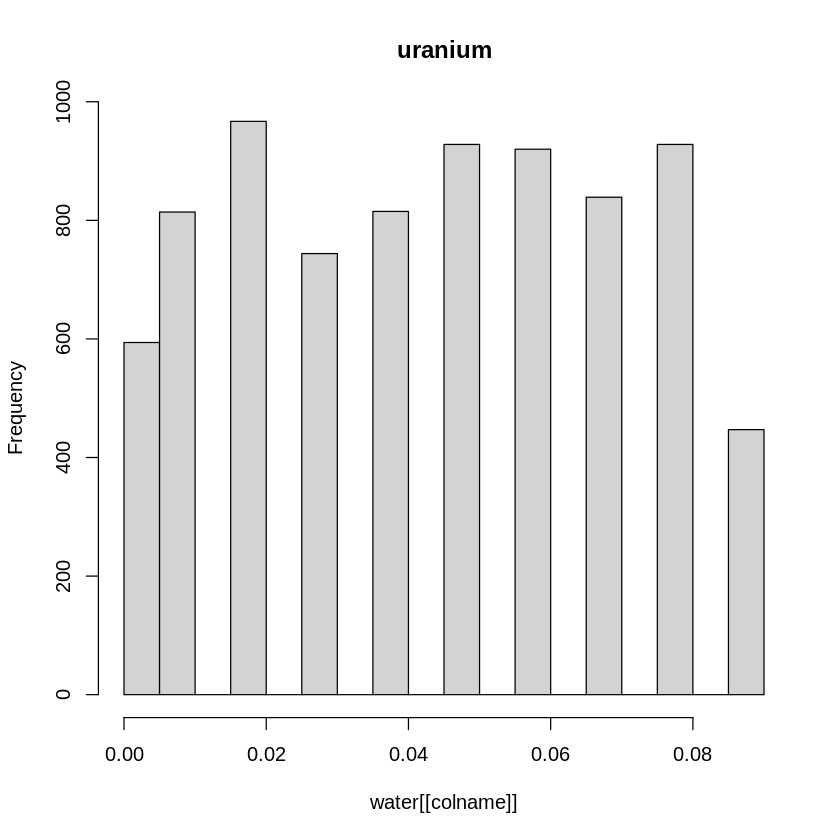

In [145]:
for (colname in colnames(water)) {
  hist(water[[colname]], main = colname)
}

Analyze Correlation of Features

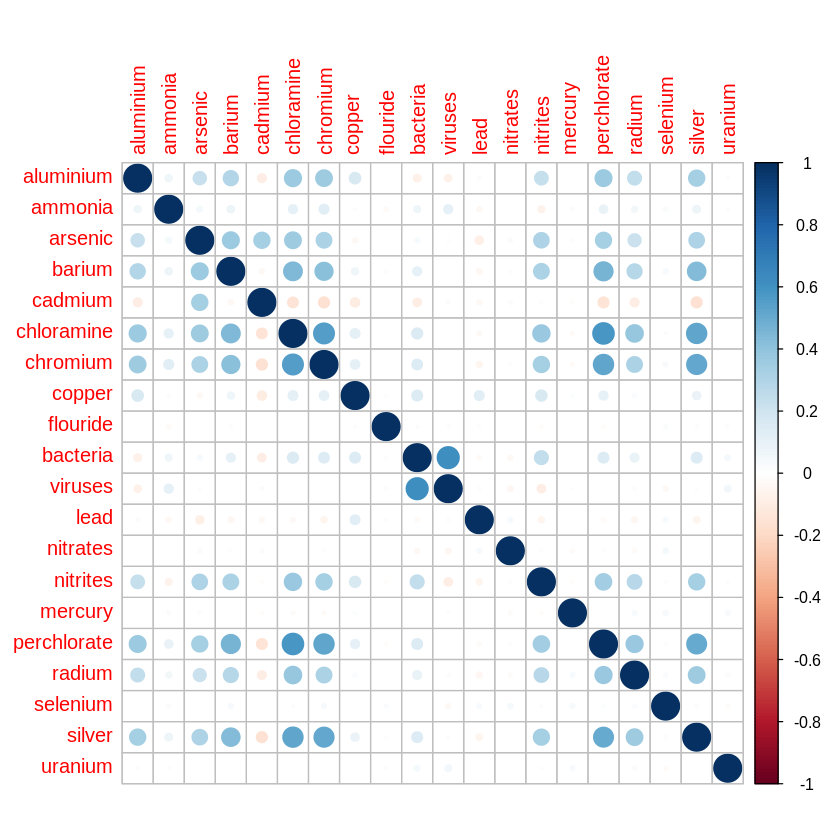

In [8]:
# Analyze corr plot
cor_matrix <- cor(water[, predictors])
corrplot(cor_matrix, method = "circle")

In [9]:
# analyze variance
var_is_safe_0 <- water %>% 
  filter(is_safe == 0) %>% 
  summarise(across(aluminium:uranium, var))

# Calculate the variance of the predictors for is_safe = 1
var_is_safe_1 <- water %>% 
  filter(is_safe == 1) %>% 
  summarise(across(aluminium:uranium, var))

# Combine the variances for each group into a single table
var_table <- bind_rows(var_is_safe_0, var_is_safe_1, .id = "is_safe")

# Print the table of variances
variance_df <- as.data.frame(var_table)

variance_df <-
  variance_df %>%
  pivot_longer(cols = predictors, names_to = "Variable", values_to = "Variance") %>%
  mutate(is_safe = ifelse(is_safe == 1, 1, 0))


Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(predictors)

  # Now:
  data %>% select(all_of(predictors))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


In [10]:
# Compare the variances with an F-Test
var_is_safe_0_list <- c()

# Loop over the columns of the data frame
for (col in names(var_is_safe_0)) {
  # Compute the variance of the variable
    col_num <- sum(var_is_safe_0[[col]])
  # Add the number to the list
  var_is_safe_0_list <- append(var_is_safe_0_list, col_num)
}

var_is_safe_1_list <- c()

# Loop over the columns of the data frame
for (col in names(var_is_safe_1)) {
  # Compute the variance of the variable  
  col_num <- sum(var_is_safe_1[[col]])
  # Add the number to the list
  var_is_safe_1_list <- append(var_is_safe_1_list, col_num)
}

# perform f-test to get confince interval
var.test(var_is_safe_0_list, var_is_safe_1_list)




	F test to compare two variances

data:  var_is_safe_0_list and var_is_safe_1_list
F = 2.3215, num df = 19, denom df = 19, p-value = 0.07407
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.9188838 5.8651936
sample estimates:
ratio of variances 
          2.321515 


In [ ]:
sort(names(water))

[1] "aluminium"   "ammonia"     "arsenic"     "bacteria"    "barium"     
 [6] "cadmium"     "chloramine"  "chromium"    "copper"      "flouride"   
[11] "is_safe"     "lead"        "mercury"     "nitrates"    "nitrites"   
[16] "perchlorate" "radium"      "selenium"    "silver"      "uranium"    
[21] "viruses"

Call:
lda(is_safe ~ ., data = water.train)

Prior probabilities of groups:
        0         1 
0.8860225 0.1139775 

Group means:
  aluminium  ammonia    arsenic   barium    cadmium chloramine  chromium
0  0.521544 14.37903 0.17556132 1.536972 0.04625287   2.033055 0.2294953
1  1.814705 13.64657 0.07547599 1.890960 0.01738134   3.520412 0.3784088
     copper  flouride  bacteria   viruses       lead nitrates nitrites
0 0.8042209 0.7709635 0.3249074 0.3437740 0.09942386 10.01549 1.325474
1 0.8498354 0.7890672 0.2989986 0.2304883 0.09923457  8.47321 1.394938
      mercury perchlorate   radium   selenium    silver    uranium
0 0.005203459    16.18270 2.887129 0.04959767 0.1434498 0.04539792
1 0.004871056    20.13645 3.316845 0.04687243 0.1897119 0.03862826

Coefficients of linear discriminants:
                     LD1
aluminium     0.64028337
ammonia      -0.01118155
arsenic      -1.66127557
barium        0.06864164
cadmium      -9.90801171
chloramine    0.13895755
chromium      0.924724

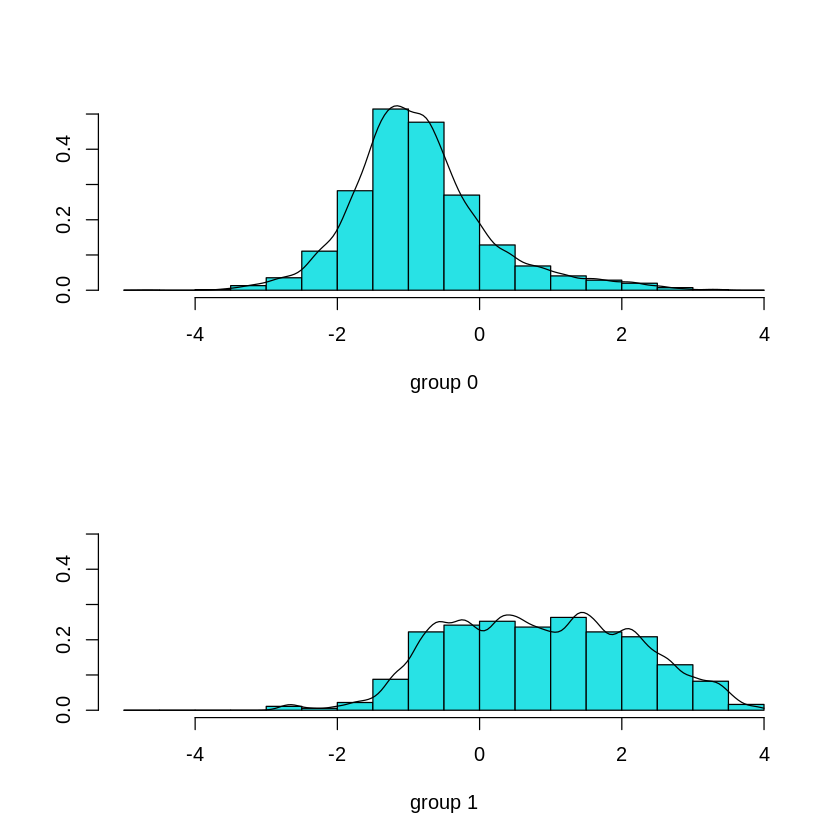

Call:
lda(is_safe ~ ., data = water.train)

Prior probabilities of groups:
        0         1 
0.8860225 0.1139775 

Group means:
  aluminium  ammonia    arsenic   barium    cadmium chloramine  chromium
0  0.524295 14.37341 0.17160067 1.530355 0.04614911   2.008899 0.2304994
1  1.889067 13.60918 0.07985597 1.882936 0.01736763   3.530823 0.3885734
     copper  flouride  bacteria   viruses       lead nitrates nitrites
0 0.7990771 0.7690683 0.3206564 0.3382721 0.09960120 9.948488 1.320589
1 0.8912483 0.7800686 0.3035391 0.2273580 0.09893553 8.897668 1.412743
      mercury perchlorate   radium   selenium    silver    uranium
0 0.005248809    15.92254 2.870895 0.05012705 0.1418564 0.04533969
1 0.004938272    20.45081 3.313923 0.04680384 0.1865706 0.04006859

Coefficients of linear discriminants:
                     LD1
aluminium     0.66302340
ammonia      -0.01493472
arsenic      -1.60451263
barium        0.06733545
cadmium      -9.86566875
chloramine    0.13356069
chromium      0.977143

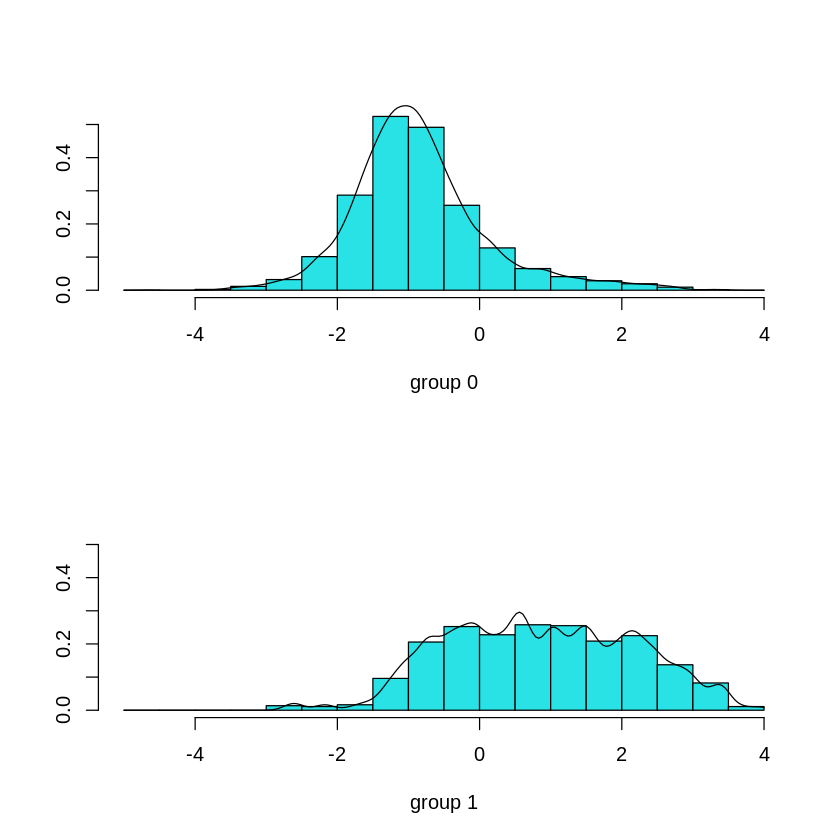

Call:
lda(is_safe ~ ., data = water.train)

Prior probabilities of groups:
       0        1 
0.885884 0.114116 

Group means:
  aluminium  ammonia    arsenic   barium    cadmium chloramine  chromium
0 0.5182107 14.39193 0.17491530 1.543894 0.04623257   2.013519 0.2294494
1 1.8327808 13.52551 0.07037534 1.879055 0.01681781   3.495233 0.3916575
     copper  flouride  bacteria   viruses       lead nitrates nitrites
0 0.7968096 0.7697953 0.3194336 0.3390709 0.09985583 9.966764 1.321078
1 0.8498767 0.7744521 0.3033151 0.2303890 0.09711644 8.712767 1.405712
      mercury perchlorate   radium   selenium    silver    uranium
0 0.005244574    16.13812 2.878571 0.05005294 0.1442862 0.04522322
1 0.004880822    20.61545 3.371507 0.04793151 0.1881644 0.03890411

Coefficients of linear discriminants:
                     LD1
aluminium     0.64445173
ammonia      -0.01410613
arsenic      -1.76950777
barium        0.05884742
cadmium      -9.57647432
chloramine    0.13304259
chromium      1.08219541
c

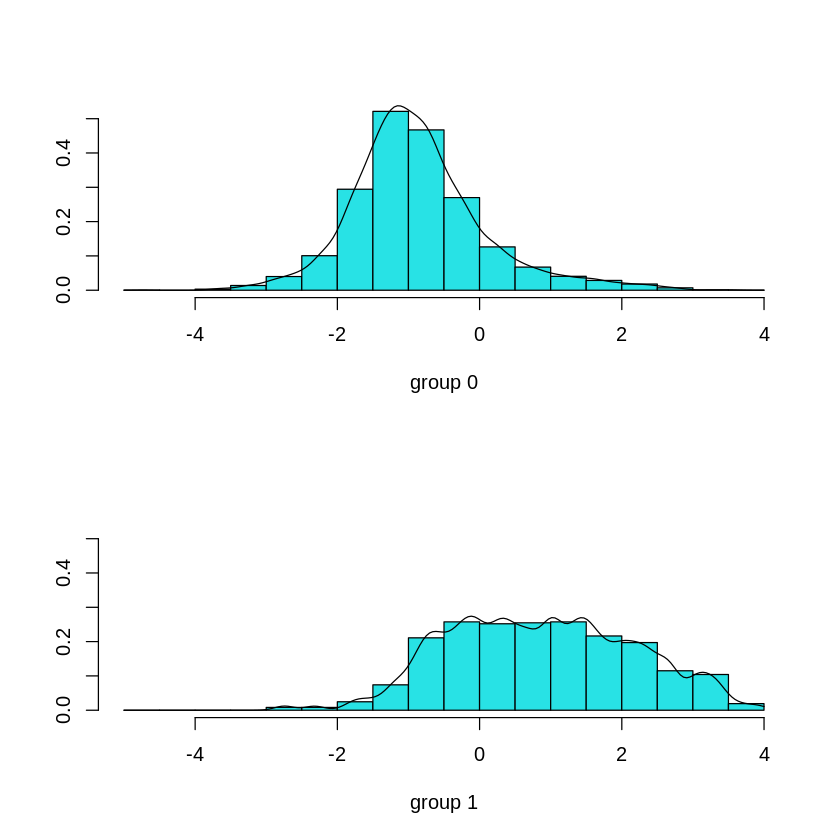

Call:
lda(is_safe ~ ., data = water.train)

Prior probabilities of groups:
       0        1 
0.885884 0.114116 

Group means:
  aluminium  ammonia    arsenic   barium    cadmium chloramine  chromium
0 0.5074784 14.30465 0.17345227 1.520745 0.04590259   1.994549 0.2294883
1 1.8694932 13.74641 0.07069863 1.856329 0.01672466   3.563438 0.3826986
     copper  flouride  bacteria   viruses       lead nitrates nitrites
0 0.8002118 0.7746338 0.3223487 0.3418994 0.09939157 9.951391 1.317978
1 0.8527808 0.7821918 0.2961644 0.2193644 0.09744521 8.759603 1.399630
      mercury perchlorate   radium   selenium    silver    uranium
0 0.005228692    15.87645 2.846139 0.05018881 0.1425075 0.04566614
1 0.004879452    20.00360 3.370630 0.04721918 0.1920411 0.03887671

Coefficients of linear discriminants:
                     LD1
aluminium     0.65387786
ammonia      -0.01215813
arsenic      -1.74945474
barium        0.06414664
cadmium      -9.55684278
chloramine    0.15063659
chromium      0.79541807
c

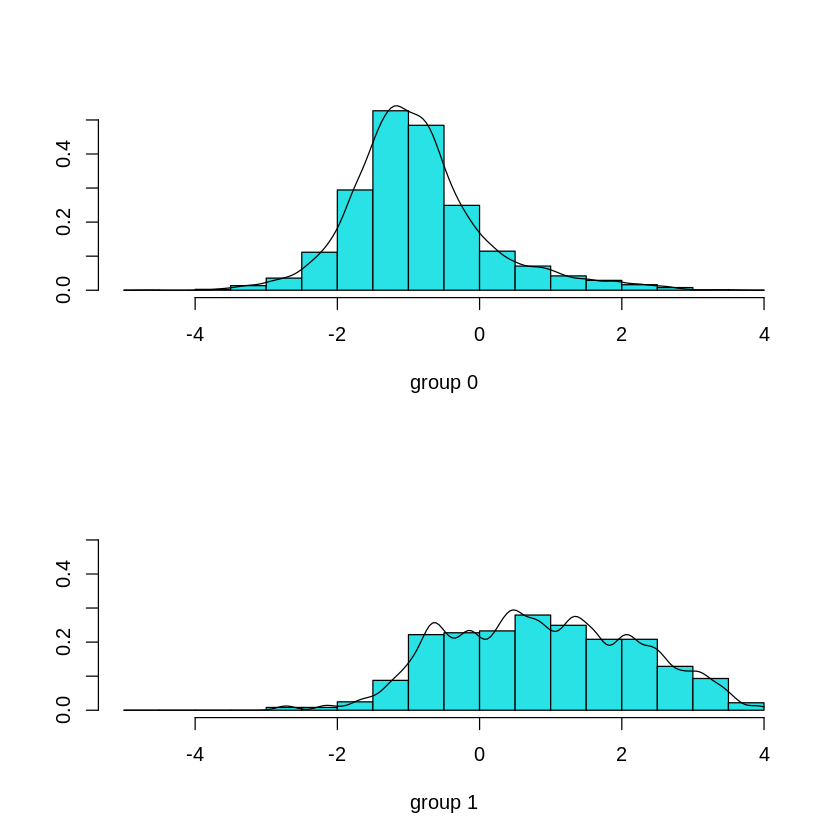

Call:
lda(is_safe ~ ., data = water.train)

Prior probabilities of groups:
        0         1 
0.8859018 0.1140982 

Group means:
  aluminium  ammonia    arsenic   barium    cadmium chloramine chromium
0  0.502373 14.30709 0.16776394 1.509441 0.04603740   1.978089 0.229049
1  1.814370 14.02759 0.07672192 1.870192 0.01711507   3.456904 0.382726
     copper  flouride  bacteria   viruses       lead nitrates nitrites
0 0.7947971 0.7686521 0.3242713 0.3463356 0.09992202 9.930935 1.315792
1 0.8546438 0.7722055 0.2951918 0.2246603 0.09634521 8.685096 1.411534
      mercury perchlorate   radium   selenium    silver    uranium
0 0.005233416    15.80330 2.848022 0.05004764 0.1404781 0.04538462
1 0.004871233    19.78764 3.323082 0.04719178 0.1882466 0.03853425

Coefficients of linear discriminants:
                      LD1
aluminium     0.657454431
ammonia      -0.009348918
arsenic      -1.645428469
barium        0.078561697
cadmium     -10.083730119
chloramine    0.137432676
chromium      0.89

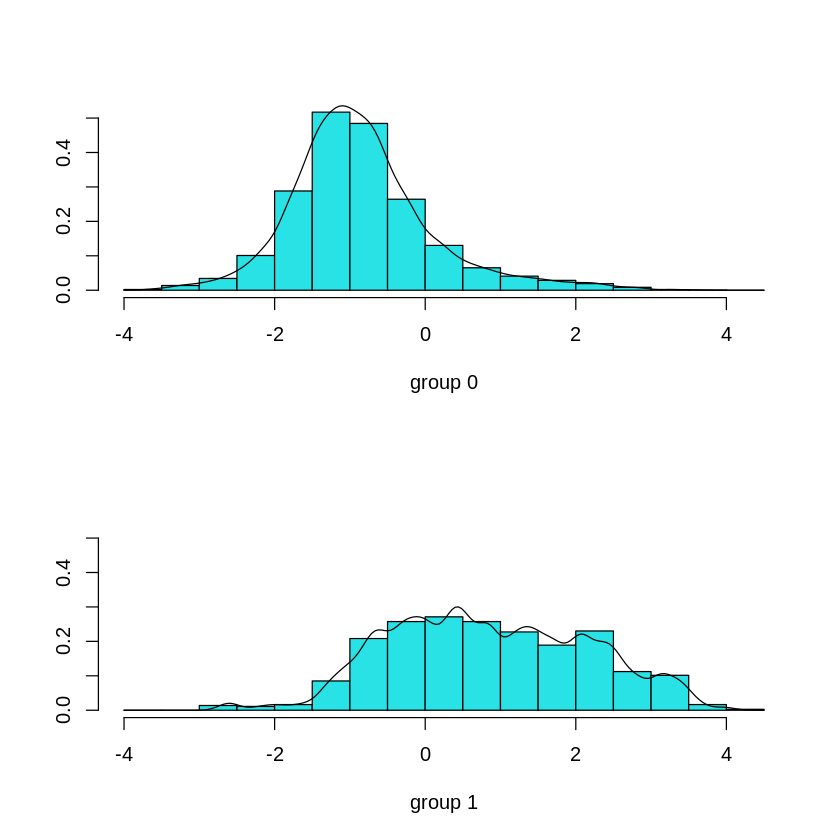

In [12]:
k = 5

folds <- createFolds(water$is_safe, k = k)

# create empty vector to store accuracies
accuracies <- numeric()

# coefficient matrix grid for 5 fold cross 
coefficients_matrix <- matrix(NA, nrow = 20, ncol = 5)


# perform LDA with 5-fold cross-validation
for (i in 1:k) {
  # split data into training and testing sets based on fold
  train_idx <- unlist(folds[-i])
  test_idx <- folds[[i]]
  water.train <- water[train_idx,]
  water.test <- water[test_idx,]
  
  # fit LDA model on training data
  fit_lda <- lda(is_safe ~ ., data = water.train) 
  
  # make predictions on testing data
  pred_lda <- predict(fit_lda, water.test)
  lda.class <- pred_lda$class
  
  # calculate accuracy and add to vector
  accuracy <- mean(lda.class == water.test$is_safe)
  accuracies[i] <- accuracy

  # Store the coefficients in the matrix
  coefficients_matrix[, i] <- fit_lda$scaling

  # Plot decision boundary
  plot(fit_lda, type = "both", main = "hello")
  print(fit_lda)
  print(table(lda.class, water.test$is_safe))

  title <- paste("Seperation of Classes from Fold", k)
}


In [18]:
# Print the average & std accuracy across all folds
cat("Mean accuracies over 5 fold cross validation:", mean(accuracies), "\n")
cat("Standard Deviation of the accuracies over 5 fold cross validation:", sd(accuracies))

Mean accuracies over 5 fold cross validation: 0.8960731 
Standard Deviation of the accuracies over 5 fold cross validation: 0.002665107

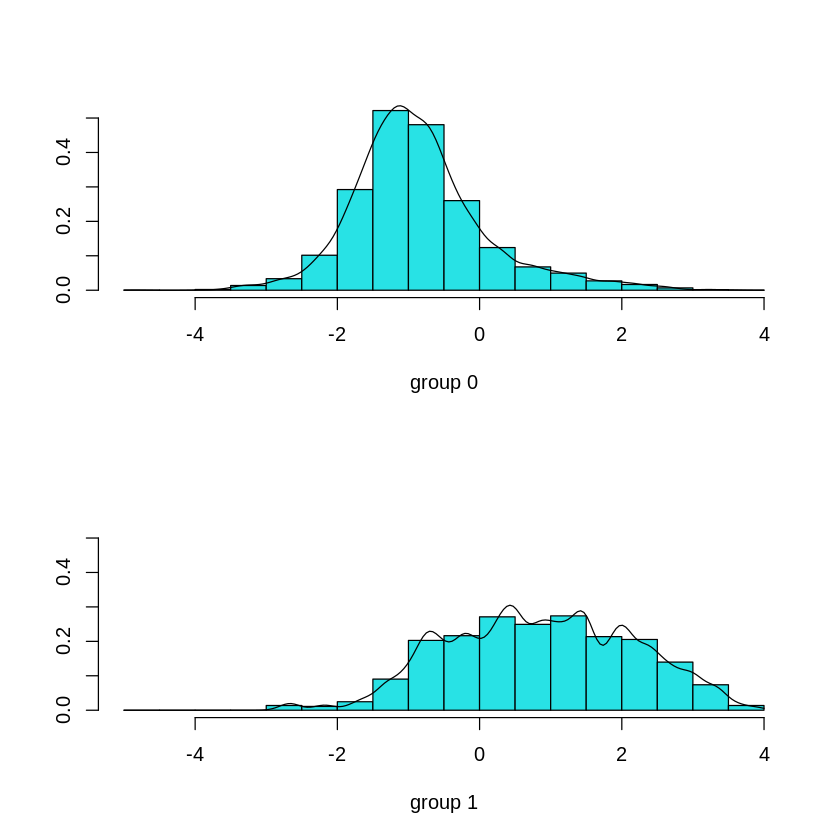

In [18]:
# plot class seperation from 5th fold
plot(fit_lda, type = "both")

In [18]:
accuracy_df

fold,accuracy
<int>,<dbl>
1,0.8962500
2,0.9018750
3,0.8974359
4,0.8880550
5,0.9005006


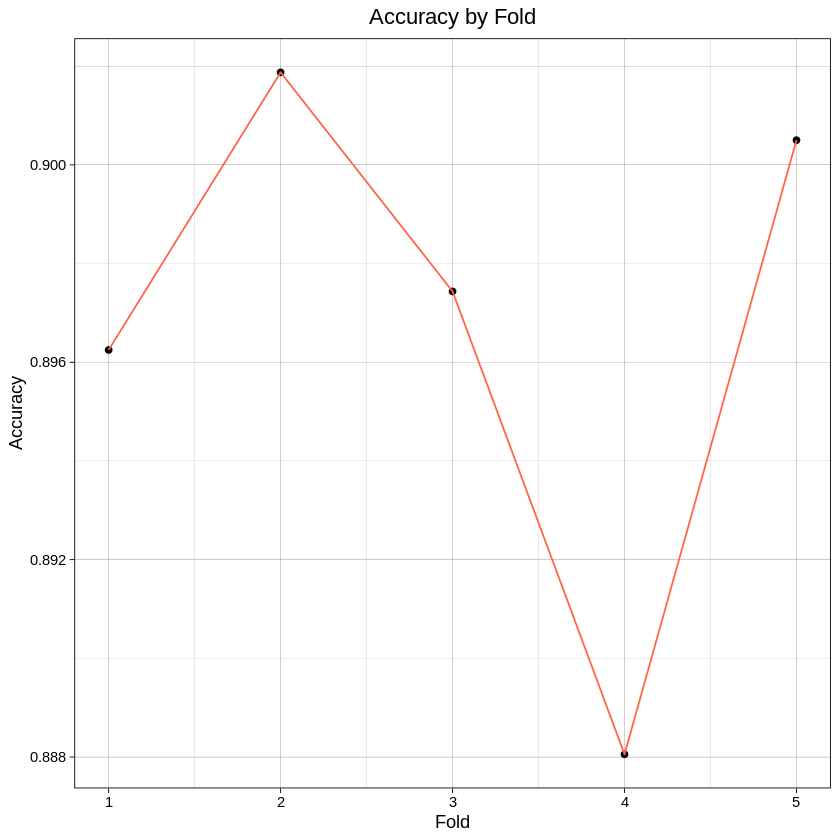

In [17]:
# create data frame for accuracy and fold
accuracy_df <- data.frame(fold = 1:k, accuracy = accuracies)

# create scatterplot
ggplot(accuracy_df, aes(x = fold, y = accuracy)) +
  theme_linedraw()+
  geom_point() +
  geom_line(col = "tomato") +
  labs(x = "Fold",
       y = "Accuracy",
       title = "Accuracy by Fold") +
  theme(plot.title = element_text(hjust = 0.5)) 


In [13]:
# get mean coefficients for each variable
# transpose matrix so columns of values for each variable by fol
 # (20x5 before and now 5x20)
coefficients_matrix <- t(coefficients_matrix)

In [14]:
# make a df for variables and their coefficients
coeff_df <- data.frame(coefficients_matrix)
names(coeff_df) <- predictors
coeff_df <-
  coeff_df %>%
    pivot_longer(cols = 1:20, names_to = "Variable", values_to = "Coefficient") %>%
    mutate(Variable = factor(Variable))

In [16]:
# make a df for variables and their mean coefficients
mean_coeff_df <- data.frame(coefficients_matrix)
names(mean_coeff_df) <- predictors

mean_coeff_df <-
  mean_coeff_df %>%
  pivot_longer(cols = 1:20, names_to = "Variable", values_to = "Coefficient") %>%
  mutate(Variable = factor(Variable)) %>%
  group_by(Variable) %>%
  summarise(Variable = Variable,
            mean_coeff = mean(Coefficient)) %>%
              distinct(Variable, .keep_all = TRUE)
mean_coeff_df

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'Variable'. You can override using the
`.groups` argument.


Variable,mean_coeff
<fct>,<dbl>
aluminium,0.65181816
ammonia,-0.01234589
arsenic,-1.68603584
bacteria,0.55593671
barium,0.06750657
cadmium,-9.79814554
chloramine,0.13872602
chromium,0.93418087
copper,-0.23783125


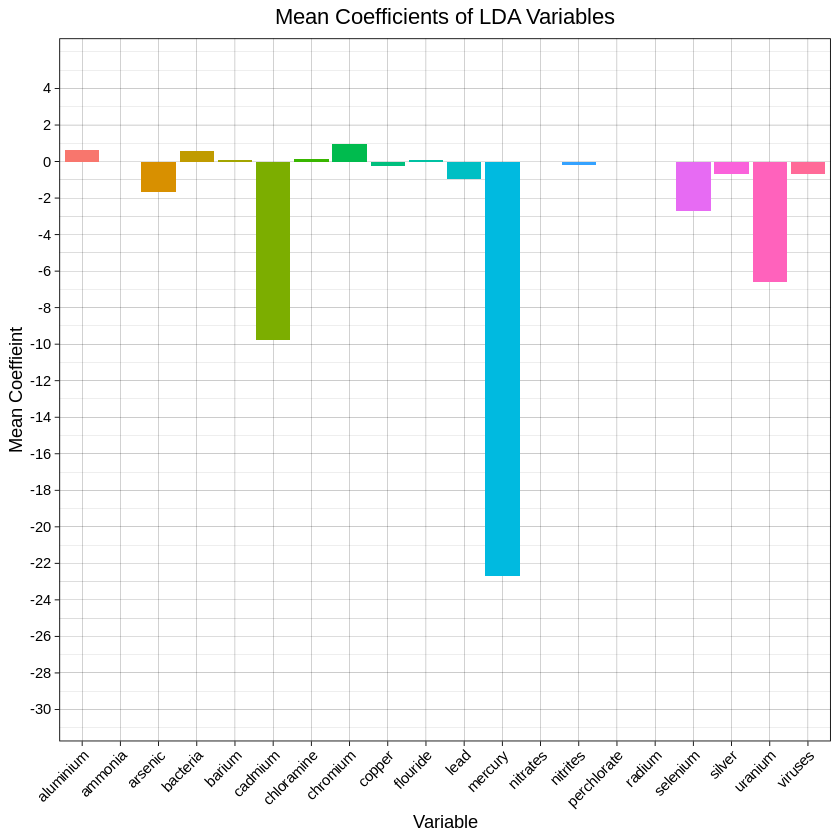

In [91]:
mean_coefficients <- colMeans(coefficients_matrix)

# Plot the mean coefficients as a bar plot
ggplot(mean_coeff_df, aes(x = Variable, y = mean_coeff, fill = Variable)) +
  geom_bar(stat = "identity") +

  theme_linedraw() +
  labs(x = "Variable",
       y = "Mean Coeffieint",
       fill = "Variable") +
  ggtitle("Mean Coefficients of LDA Variables")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(plot.title = element_text(hjust = 0.5), legend.position = "none") +
  scale_y_continuous(limits = c(-30, 5), breaks = seq(-30, 5, by = 2)) 




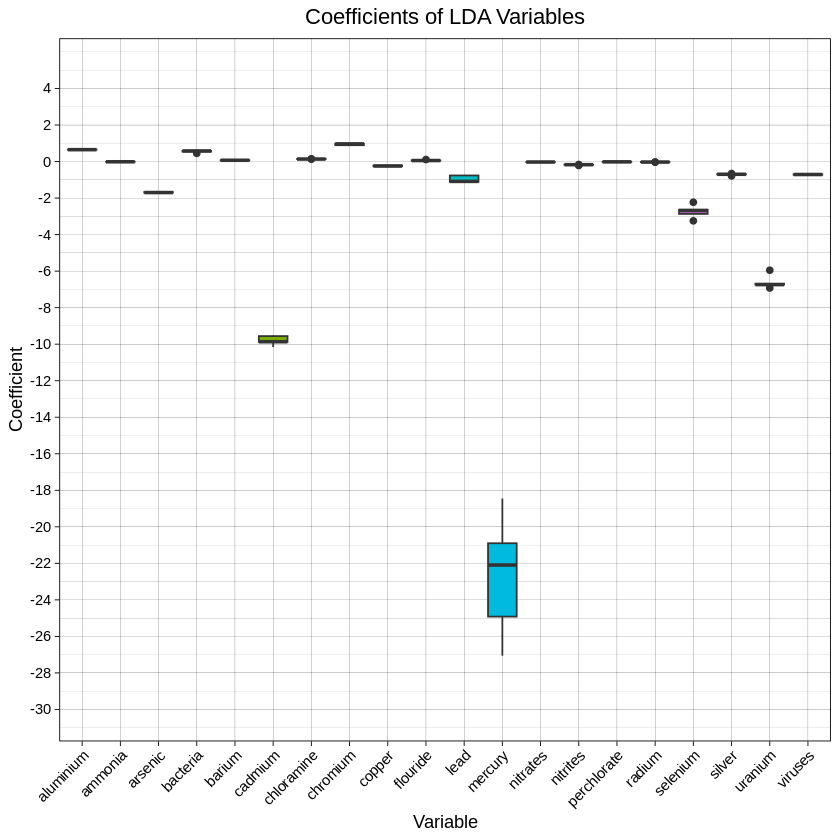

In [24]:
# Plot the coefficients as boxplots plot

ggplot(coeff_df, aes(x = Variable, y = Coefficient, fill = Variable)) +
  geom_boxplot() +
  xlab("Variable") + ylab("Coefficient") +
  ggtitle("Coefficients of LDA Variables")+
  theme_linedraw()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_y_continuous(limits = c(-30, 5), breaks = seq(-30, 5, by = 2)) +
  theme(legend.position = "none")



## K-Fold Cross Validation for Random Forest

In [19]:
important_vars <- c("aluminium", "ammonia", "cadmium", "bacteria", "viruses",
 "nitrates", "perchlorate", "radium", "silver", "uranium")

# set seed to make random folds reproducable
set.seed(42)

# specify number of folds
k = 5

# Create a 5-fold cross-validation partitioning
folds <- createFolds(water$is_safe, k = k)

# Create an empty vector to store the accuracy scores for each fold
accuracy_scores <- c()

# Loop over the folds
for (i in 1:k) {
  # Split the data into training and validation sets
  train_indices <- folds[[i]]
  train_data <- water[train_indices, c(important_vars, "is_safe")]
  validation_data <- water[-train_indices, c(important_vars, "is_safe")]
  
  # set seed again to keep model randomness constant across all folds
  set.seed(42)

  # Train the random forest model
  rf.water <- randomForest(is_safe ~ ., 
                            data = train_data, 
                            # sample 10 random variables at each split
                            mtry = 10, 
                            importance = TRUE, 
                            proximity = TRUE, 
                            # use bernoilli because target is binary
                            distribution = "bernoulli", 
                            # best 2500.. 0.9504
                            ntree = 2500, 
                            shrinkage = 0.1, 
                            verbose = F)

  print(rf.water)
  
  # Make predictions on the validation set
  predictions <- predict(rf.water, validation_data[, c(important_vars, "is_safe")])
  
  # Calculate accuracy and store it
  conf_mat <- table(predictions, validation_data$is_safe)
  accuracy_scores[i] <- sum(diag(conf_mat))/sum(conf_mat)
}



Call:
 randomForest(formula = is_safe ~ ., data = train_data, mtry = 10,      importance = TRUE, proximity = TRUE, distribution = "bernoulli",      ntree = 2500, shrinkage = 0.1, verbose = F) 
               Type of random forest: classification
                     Number of trees: 2500
No. of variables tried at each split: 10

        OOB estimate of  error rate: 4.57%
Confusion matrix:
     0   1 class.error
0 1403  14 0.009880028
1   59 123 0.324175824

Call:
 randomForest(formula = is_safe ~ ., data = train_data, mtry = 10,      importance = TRUE, proximity = TRUE, distribution = "bernoulli",      ntree = 2500, shrinkage = 0.1, verbose = F) 
               Type of random forest: classification
                     Number of trees: 2500
No. of variables tried at each split: 10

        OOB estimate of  error rate: 5.69%
Confusion matrix:
     0   1 class.error
0 1386  30  0.02118644
1   61 122  0.33333333

Call:
 randomForest(formula = is_safe ~ ., data = train_data, mtry = 10,   

In [22]:
max(accuracy_scores)

[1] 0.953103

In [26]:
# Print the average & std accuracy across all folds
cat("Mean accuracies over 5 fold cross validation:", mean(accuracy_scores), "\n")
cat("Standard Deviation of the accuracies over 5 fold cross validation:", sd(accuracy_scores))


Mean accuracies over 5 fold cross validation: 0.9504127 
Standard Deviation of the accuracies over 5 fold cross validation: 0.002618467

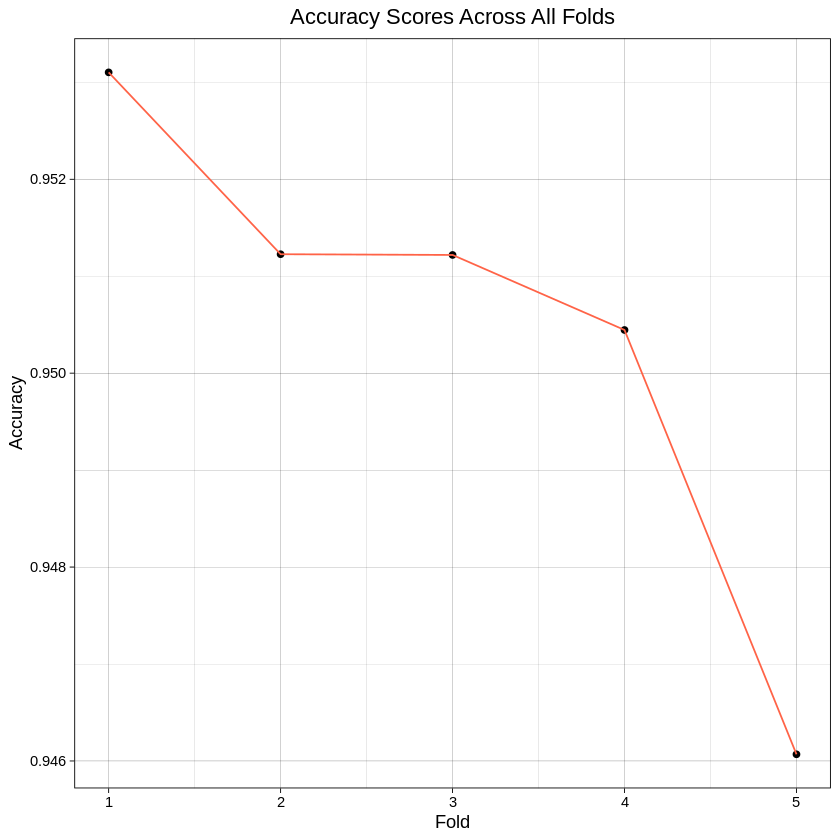

In [47]:
fold_df <- data.frame(Fold = 1:5, Accuracy = accuracy_scores)

# Create a scatterplot
ggplot(fold_df, aes(x = Fold, y = Accuracy)) +
  geom_point() +
  theme_linedraw() +
  geom_line(col = "tomato") +
  labs(x = "Fold", y = "Accuracy", title = "Accuracy Scores Across All Folds") +
  theme(plot.title = element_text(hjust = 0.5)) 

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
aluminium,120.61331,270.758501,210.21016,70.628167
ammonia,47.15620,18.273604,49.40434,22.109464
cadmium,76.12566,323.286655,242.08286,73.943091
bacteria,26.98547,19.152148,32.21502,7.730313
viruses,21.34564,19.141535,25.21572,9.922263
nitrates,28.49397,46.363370,44.64109,24.337416
perchlorate,110.84951,40.080007,118.49040,68.337510
radium,22.69006,3.578065,22.78500,17.614873
silver,78.07073,16.179000,78.13803,14.408982
uranium,18.03439,30.599348,29.11301,13.136191


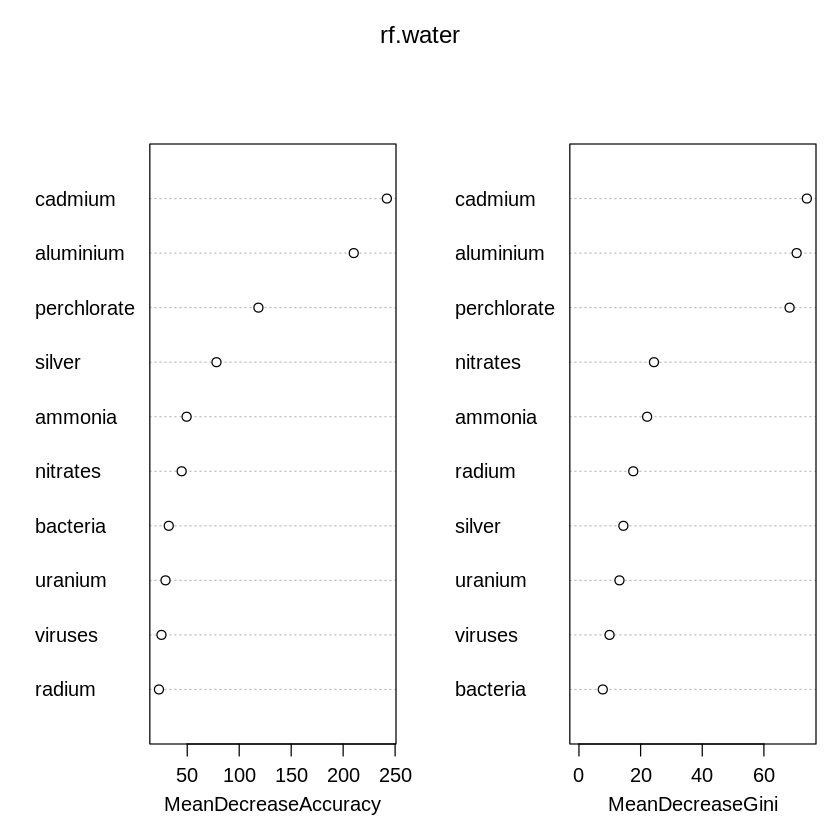

In [28]:
importance(rf.water)


png 
  2

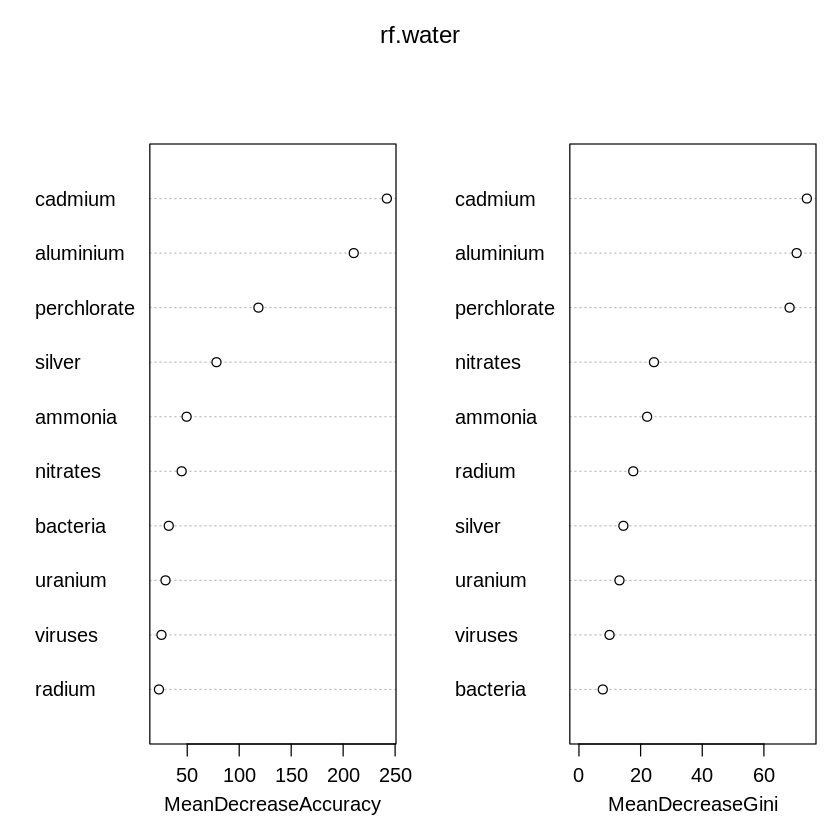

In [55]:
varImpPlot(rf.water)

pdf("var_imp_plot.pdf", height = 3.75, width = 7)
varImpPlot(rf.water)
dev.off()